1. Data Generators Setup

- Load images from train and test folders using ImageDataGenerator.
- Apply rescaling.
- Apply validation split on the training folder.
- Check class indices and number of samples.

In [1]:
# Step 1: Baseline CNN: Data Generators Setup

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'E:/CY Tech/Big Data project/Project 2 DermNet Skin Disease Classification/Data/Raw/train'
test_dir = 'E:/CY Tech/Big Data project/Project 2 DermNet Skin Disease Classification/Data/Raw/test'

# basic settings
img_height = 224
img_width = 224
batch_size = 32

# train + validation generator with augmentation OFF for baseline
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# training set (80 percent)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# validation set (20 percent)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

# test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print("Classes found:")
print(train_generator.class_indices)

Found 12453 images belonging to 23 classes.
Found 3104 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.
Classes found:
{'Acne and Rosacea Photos': 0, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1, 'Atopic Dermatitis Photos': 2, 'Bullous Disease Photos': 3, 'Cellulitis Impetigo and other Bacterial Infections': 4, 'Eczema Photos': 5, 'Exanthems and Drug Eruptions': 6, 'Hair Loss Photos Alopecia and other Hair Diseases': 7, 'Herpes HPV and other STDs Photos': 8, 'Light Diseases and Disorders of Pigmentation': 9, 'Lupus and other Connective Tissue diseases': 10, 'Melanoma Skin Cancer Nevi and Moles': 11, 'Nail Fungus and other Nail Disease': 12, 'Poison Ivy Photos and other Contact Dermatitis': 13, 'Psoriasis pictures Lichen Planus and related diseases': 14, 'Scabies Lyme Disease and other Infestations and Bites': 15, 'Seborrheic Keratoses and other Benign Tumors': 16, 'Systemic Disease': 17, 'Tinea Ringworm Candidiasis and other Fungal I

2. Baseline CNN Architecture

- Build a simple CNN with Conv2D, MaxPooling2D and Dense layers.
- Use softmax activation in the final layer.
- Keep it simple for the baseline model.

In [2]:
# Step 2 : Baseline CNN Architecture

from tensorflow.keras import models, layers

num_classes = train_generator.num_classes

baseline_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

baseline_model.summary()

C:\Users\fdame\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 23)             │         2,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,171,927 (42.62 MB)

 Trainable params: 11,171,927 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

3. Training

- Train the model for a few epochs.
- Track training and validation accuracy and loss.

In [3]:
# Sstep 3: Training the Baseline CNN

baseline_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

epochs = 3  # small number for baseline

history = baseline_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 122s 310ms/step - accuracy: 0.1441 - loss: 2.8693 - val_accuracy: 0.1524 - val_loss: 2.9102
Epoch 2/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 119s 306ms/step - accuracy: 0.2081 - loss: 2.6600 - val_accuracy: 0.1620 - val_loss: 2.8699
Epoch 3/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 122s 312ms/step - accuracy: 0.2660 - loss: 2.4743 - val_accuracy: 0.1534 - val_loss: 2.9195


4. Learning Curves

- Plot the accuracy curves.
- Plot the loss curves.
- Comment on underfitting or overfitting.

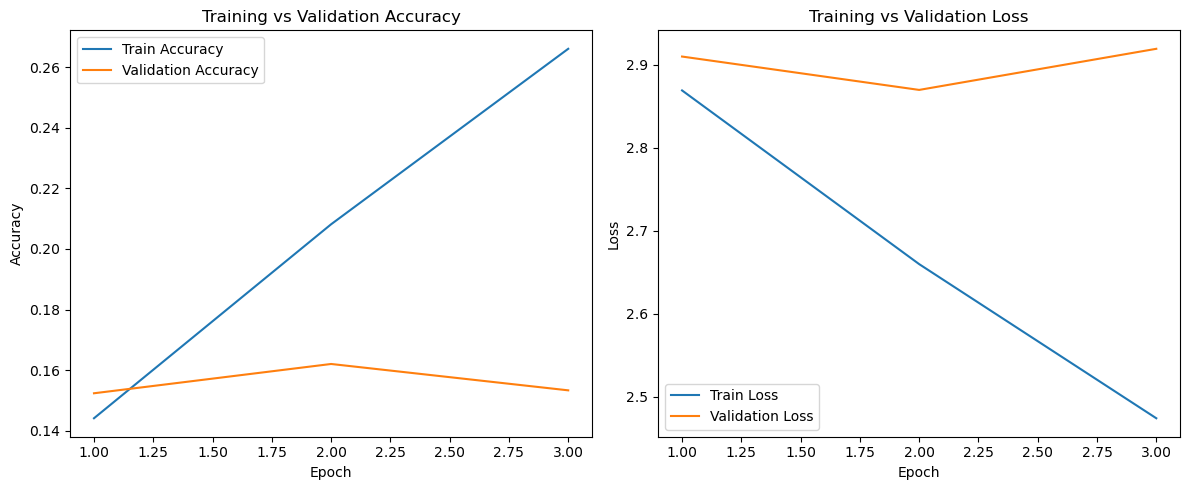

In [4]:
# Step 4: Learning Curves

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

5. Evaluation Metrics

- Evaluate the baseline model on the test set.
- Compute accuracy.
- Generate a confusion matrix.
- Generate a classification report.

In [5]:
# Step 5: Evaluate on Test Set

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# evaluate test accuracy
test_loss, test_acc = baseline_model.evaluate(test_generator)
print("Test accuracy:", test_acc)

# get predictions
pred_probs = baseline_model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)

# true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

print("Confusion Matrix:")
print(cm)

# classification report
print("Classification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.2074 - loss: 2.7280
Test accuracy: 0.20739629864692688
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step
Confusion Matrix:
[[124   9   0   0   0   3   0   1   0   4   0   0   5   0   8   0  21   2
   21   0   0   1 113]
 [ 29  45   1   1   0   8   0   0   0   3   1   0   8   0   9   0  55  11
   24   0   0   0  93]
 [ 11   2   1   1   0  17   1   0   0   4   2   0   7   0   6   0  11  10
   19   0   1   2  28]
 [ 12   7   1   6   0   3   0   0   0   4   2   0   3   0   8   0  16   4
   11   1   0   1  34]
 [ 11   4   0   4   0  10   0   0   0   2   1   0   2   0   2   0   8   3
    6   0   0   1  19]
 [ 17   5   5   1   0  98   0   3   0   5   1   0  27   0  18   0  20   9
   30   0   1   2  67]
 [ 12   4   0   8   0   7   5   0   0   1   0   0   5   0  13   0   7  11
   13   0   0   0  15]
 [  1   1   0   0   0   1   0   3   0   3   0   0   1   0   3   0  12   6
   22   0   0   0   7]
 [  8   9   1   2   0   2   0   1   1   0   0   0

C:\Users\fdame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fdame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fdame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6. Baseline Summary

The baseline CNN model was trained for a few epochs to test the pipeline and verify that the dataset is loaded correctly. The model reached a moderate training and validation accuracy, which is expected for a simple architecture on a large medical dataset.

Main observations:
- The model shows signs of underfitting because the architecture is small and training time was short.
- There is class imbalance in the dataset, so some classes have much lower performance.
- Medical images have high variation in color, brightness and texture, which makes the problem harder for a small CNN.
- The baseline serves mainly as a starting point before using a stronger pretrained model.

This baseline will be used to compare with a pretrained model in the next notebook.